PASO 1: INSTALACION DE LIBRERIAS ESCENCIALES PARA LA MANIPULACION DE DATOS

In [41]:
# !pip install pandas numpy matplotlib seaborn

PASO 2: IMPORTACION DE LAS LIBRERIAS

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
# Configurar visualizaciones
%matplotlib inline
plt.style.use('ggplot')

PASO 3: CARGA DEL DATASET

In [45]:
# Cargar el dataset
df = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv')  

# Mostrar dimensiones iniciales
print("Dimensiones iniciales del dataset:", df.shape)
print("\nPrimeras 5 filas:")
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd6 in position 136: invalid continuation byte

PASO 4: CORRECCION DE ERRORES DE LECTURA DE LOS ARCHIVOS POR SU TIPO DE CODIFICACION Y VERIFICACION DE LA CARGA EXITOSA DEL DATASET

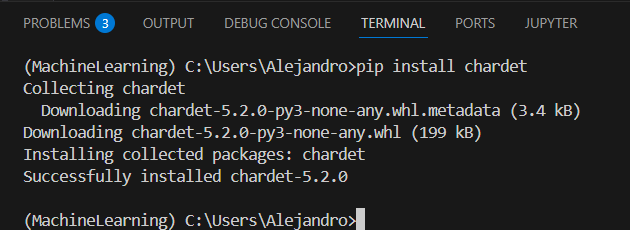

In [46]:
## Corrección de problemas en la lectura de archivos por incompatibilidades de los tipos de encoders

# usamos chardet para poder detectar el tipo de codificación del archivo que se intenta leer:

import chardet

# Detectamos el encoding
with open('Summer-Olympic-medals-1976-to-2008.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
print(f"Encoding detectado: {result['encoding']}")

# leemos el archivo de acuerdo al encoding detectado
df = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding=result['encoding'])

# Mostrar dimensiones iniciales
print("Dimensiones iniciales del dataset:", df.shape)
print("\nPrimeras 5 filas:")
df.head()

Encoding detectado: ISO-8859-1
Dimensiones iniciales del dataset: (15433, 11)

Primeras 5 filas:


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


PASO 5: ETAPA DE VERIFICACION DE LA INFORMACION (ANALISIS EXPLORATORIO DEL DATASET) ¿QUE TAN "DIRTY" ESTA?

In [47]:
# Imprimimos el dataset entero para ver que informacion estaba perdida

print(df)


           City    Year      Sport       Discipline           Event  \
0      Montreal  1976.0   Aquatics           Diving  3m springboard   
1      Montreal  1976.0   Aquatics           Diving  3m springboard   
2      Montreal  1976.0   Aquatics           Diving  3m springboard   
3      Montreal  1976.0   Aquatics           Diving  3m springboard   
4      Montreal  1976.0   Aquatics           Diving    10m platform   
...         ...     ...        ...              ...             ...   
15428   Beijing  2008.0  Wrestling  Wrestling Gre-R       66 - 74kg   
15429   Beijing  2008.0  Wrestling  Wrestling Gre-R       66 - 74kg   
15430   Beijing  2008.0  Wrestling  Wrestling Gre-R       55 - 60kg   
15431   Beijing  2008.0  Wrestling  Wrestling Gre-R       60 - 66kg   
15432   Beijing  2008.0  Wrestling  Wrestling Gre-R      96 - 120kg   

                        Athlete Gender Country_Code        Country  \
0               KÖHLER, Christa  Women          GDR   East Germany   
1      

In [48]:
# Uso del método info() para saber los tipos de datos

print("\nInformación general:")
df.info()
print("\n")
print("\nEstadísticas descriptivas:")
df.describe(include='all')

# 117 vallores nulos para el anio.
#mean indica el promedio de los valores 

# Años: Las olimpiadas van de 1976 a 2008
#
# Ciudades: 9 ciudades distintas, siendo Beijing la más frecuente (2042 apariciones)
#
# Deportes: 28 deportes diferentes, Aquatics es el más común
#
# Atletas: 11,337 atletas únicos, Michael Phelps es el más frecuente
#
# Género: Mayoría de hombres (9,388 vs mujeres)
#
# Países: 128 códigos de país, Estados Unidos (USA) es el más frecuente
#
# Medallas: Bronce es la más común (5,258)


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB



Estadísticas descriptivas:


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
count,15316,15316.000000,15316,15316,15316,15316,15316,15316,15316,15316,15316
unique,9,NaN,28,41,293,11337,2,128,127,3,3
top,Beijing,NaN,Aquatics,Athletics,hockey,"PHELPS, Michael",Men,USA,United States,M,Bronze
freq,2042,NaN,2210,1523,817,16,9388,1992,1992,8817,5258
mean,NaN,1993.620789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,10.159851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1976.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1996.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

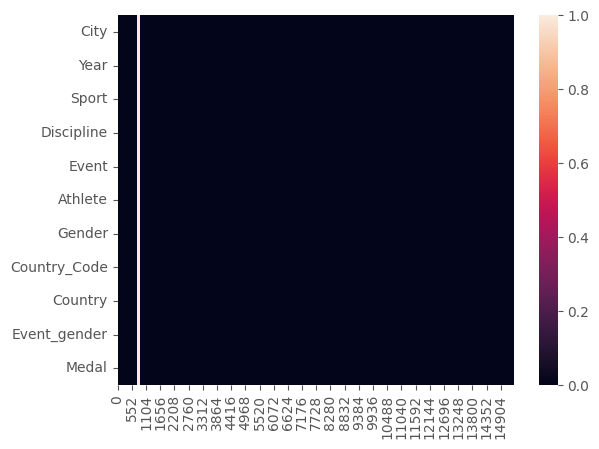

In [49]:
# Usamos Seaborn vara ver el perfil de datos perdidos
sns.heatmap(df.isna().transpose())

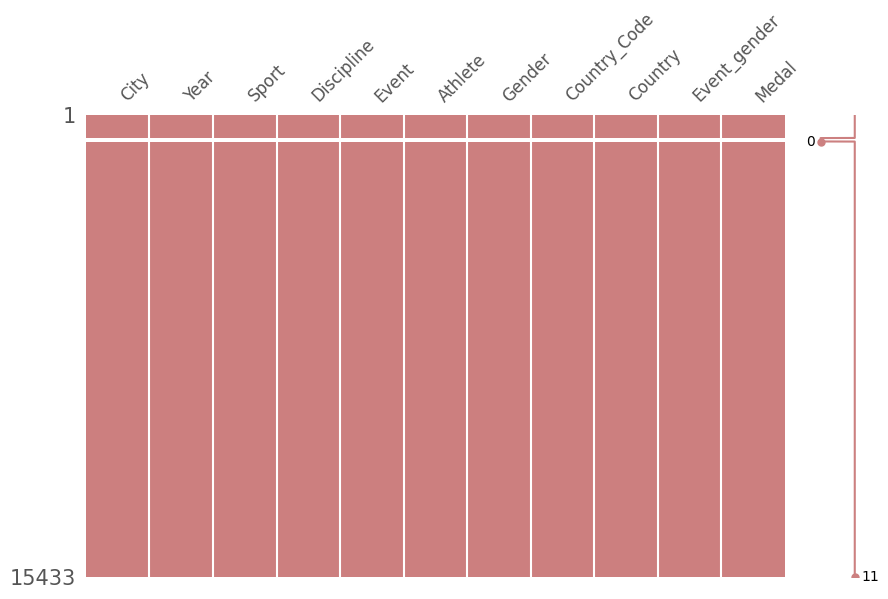

In [50]:
# Uso de Missingno para ver las columnas con datos perdidos
import missingno as msno

msno.matrix(df, figsize=(10,6), fontsize=12, color=(0.8, 0.5, 0.5))
plt.show()

In [51]:
# Porcentaje de valores faltantes por columna
print("Porcentaje de valores nulos por columna:")
print(df.isnull().mean().round(4)*100)

Porcentaje de valores nulos por columna:
City            0.76
Year            0.76
Sport           0.76
Discipline      0.76
Event           0.76
Athlete         0.76
Gender          0.76
Country_Code    0.76
Country         0.76
Event_gender    0.76
Medal           0.76
dtype: float64


PASO 5.1: IDENTIFICAR LAS FILAS CON VALORES FALTANTES

In [52]:
# Filtramos el DataFrame para mostrar solo las filas que tienen al menos un valor nulo
filas_con_nulos = df[df.isnull().any(axis=1)]
print(f"Número de filas con al menos un valor nulo: {len(filas_con_nulos)}")
print(f"Esto representa el {len(filas_con_nulos)/len(df)*100:.2f}% del total de filas")

# Mostramos las primeras filas con valores nulos
filas_con_nulos

Número de filas con al menos un valor nulo: 117
Esto representa el 0.76% del total de filas


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PASO 6: MANIPULACION DEL DATAFRAME CON LA DATA PARA DEJARLO LIMPIO

In [53]:
# Eliminamos todas las celdas conn valor NaN
df_clean = df.dropna(how='all')

# Validamos el numero de filas eliminadas
print(f"Filas antes de la limpieza: {len(df)}")
print(f"Filas después de la limpieza: {len(df_clean)}")
print(f"Filas eliminadas: {len(df) - len(df_clean)}")

# Verificamos que no quedan filas completamente vacías
print("\nFilas completamente vacías después de la limpieza:")
print(df_clean[df_clean.isnull().all(axis=1)])

Filas antes de la limpieza: 15433
Filas después de la limpieza: 15316
Filas eliminadas: 117

Filas completamente vacías después de la limpieza:
Empty DataFrame
Columns: [City, Year, Sport, Discipline, Event, Athlete, Gender, Country_Code, Country, Event_gender, Medal]
Index: []


<Axes: >

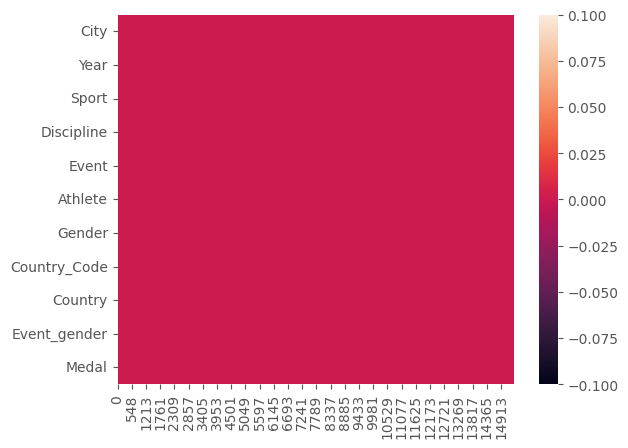

In [58]:
sns.heatmap(df_clean.isna().transpose())

PASO 7: ANALISIS DE VARIABLES

TOP 10 PAÍSES CON MÁS MEDALLAS (1976-2008)
 1. United States              1992 medallas
 2. Soviet Union               1021 medallas
 3. Australia                   798 medallas
 4. Germany                     691 medallas
 5. China                       679 medallas
 6. Russia                      638 medallas
 7. East Germany                626 medallas
 8. Italy                       486 medallas
 9. Romania                     482 medallas
10. United Kingdom              467 medallas


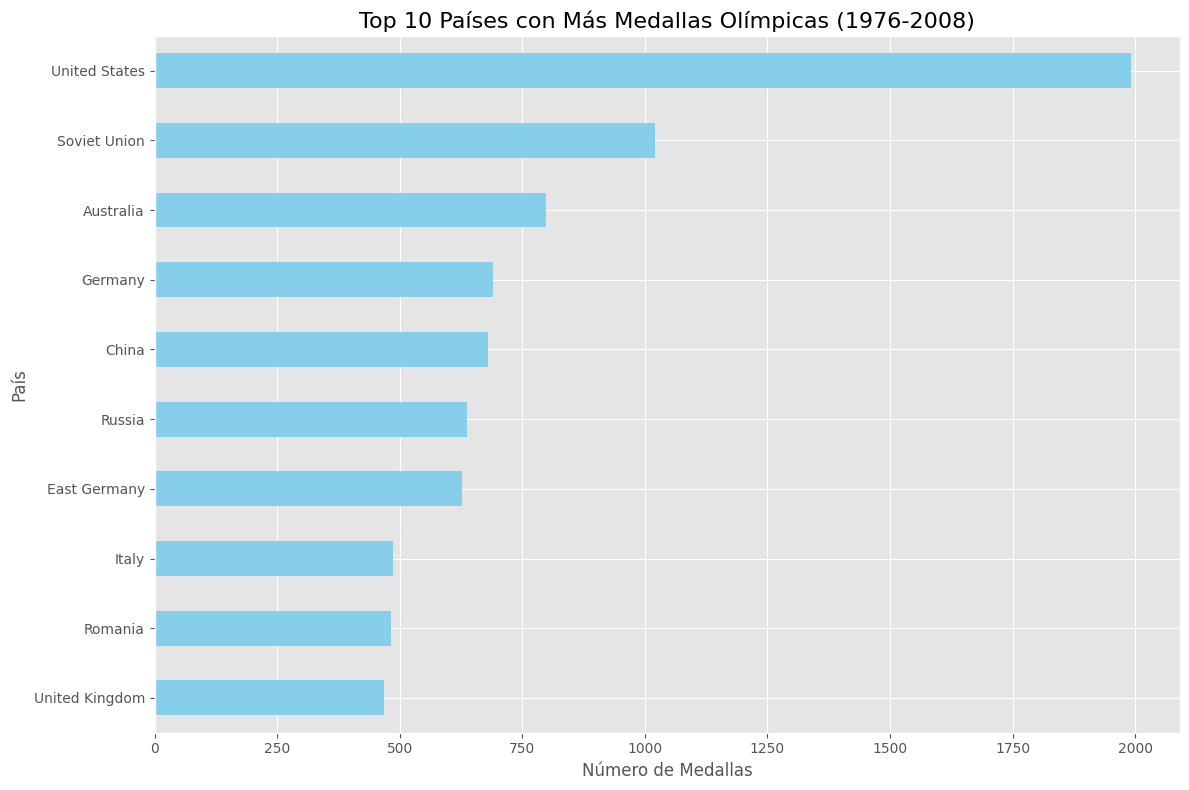

In [60]:
# Contamos medallas por país
medallas_por_pais = df_clean['Country'].value_counts().head(10)

print("TOP 10 PAÍSES CON MÁS MEDALLAS (1976-2008)")
print("=" * 50)
for i, (pais, cantidad) in enumerate(medallas_por_pais.items(), 1):
    print(f"{i:2d}. {pais:<25} {cantidad:>5} medallas")

# generamos el gráfico de barras
plt.figure(figsize=(12, 8))
medallas_por_pais.plot(kind='barh', color='skyblue')
plt.title('Top 10 Países con Más Medallas Olímpicas (1976-2008)', fontsize=16)
plt.xlabel('Número de Medallas', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el país con más medallas en la parte superior
plt.tight_layout()
plt.show()

In [ ]:
# Contamos medallas por tipo y país
medallas_por_tipo = df_clean.groupby(['Country', 'Medal']).size().unstack(fill_value=0)

# Calculamos el total de medallas por país
medallas_por_tipo['Total'] = medallas_por_tipo.sum(axis=1)

# Obtenemos los top 10 países
top_10_paises = medallas_por_tipo.nlargest(10, 'Total')

print("TOP 10 PAÍSES CON MÁS MEDALLAS POR TIPO")
print("=" * 60)
print(top_10_paises)

# Visualizamos las medallas por tipo
top_10_paises[['Gold', 'Silver', 'Bronze']].plot(kind='barh', stacked=True, 
                                                 color=['gold', 'silver', 'peru'],
                                                 figsize=(12, 8))
plt.title('Distribución de Medallas por Tipo - Top 10 Países (1976-2008)', fontsize=16)
plt.xlabel('Número de Medallas', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.legend(title='Tipo de Medalla')
plt.tight_layout()
plt.show()